In [1]:
# random forest regressor on 20m resolution images

import numpy as np
import pandas as pd
import sklearn
import math

In [2]:
df = pd.read_excel("./../dataset-Icheon&CHL/2000_20m_final_20221111.xlsx", sheet_name = "2000_20221029_final")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             92 non-null     float64       
 1   xcoord(long)   92 non-null     float64       
 2   ycoord(lat)    92 non-null     float64       
 3   sampling date  92 non-null     datetime64[ns]
 4   sensing date   92 non-null     datetime64[ns]
 5   B2             92 non-null     float64       
 6   B3             92 non-null     float64       
 7   B4             92 non-null     float64       
 8   B5             92 non-null     float64       
 9   B6             92 non-null     float64       
 10  B7             92 non-null     float64       
 11  B8A            92 non-null     float64       
 12  B11            92 non-null     float64       
 13  B12            92 non-null     float64       
 14  NDVI           92 non-null     float64       
 15  BSI            92 non-n

In [4]:
df = pd.DataFrame(df[['B2','B3','B4','B5','B6','B7','B8A','B11','B12','NDVI','BSI','EVI','AVI','SAVI','NDMI','SWHC','Sand (%)','Silt (%)','Clay (%)','SOC']])

In [5]:
df.head()

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
0,1929.0,2325.0,2793.0,3124.0,3434.0,3429.0,3635.0,4849.0,3928.0,0.130989,0.157353,0.355184,-2044.453828,0.196469,-0.143093,0.70,68.0,30.5,1.6,0.71
1,2298.0,2778.0,3347.0,3668.0,3849.0,3983.0,4165.0,5314.0,4385.0,0.108892,0.145332,0.291601,-2250.598795,0.163328,-0.121215,0.75,75.2,23.6,1.2,0.86
2,2219.0,2787.0,3469.0,3898.0,4111.0,4265.0,4303.0,5617.0,4448.0,0.107308,0.164275,0.246003,-2317.423972,0.160952,-0.132460,0.80,63.8,33.5,2.7,0.87
3,2171.0,2654.0,3191.0,3550.0,3702.0,3827.0,3951.0,5078.0,4200.0,0.106413,0.149190,0.278776,-2123.751841,0.159608,-0.124820,1.00,77.8,17.6,4.7,1.00
4,1790.0,2012.0,2292.0,2565.0,2807.0,3083.0,3344.0,4109.0,3290.0,0.186657,0.109840,0.716231,-2004.944550,0.279961,-0.102643,0.70,81.1,16.0,2.9,0.84


In [6]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [7]:
# normalize1
# band 값만 10000으로 나누기
df['B2'] = df['B2']/10000
df['B3'] = df['B3']/10000
df['B4'] = df['B4']/10000
df['B5'] = df['B5']/10000
df['B6'] = df['B6']/10000
df['B7'] = df['B7']/10000
df['B8A'] = df['B8A']/10000
df['B11'] = df['B11']/10000
df['B12'] = df['B12']/10000


In [8]:
df['AVI'] = df['AVI']/10000
print(df)

         B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0    0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
1    0.2298  0.2778  0.3347  0.3668  0.3849  0.3983  0.4165  0.5314  0.4385   
2    0.2219  0.2787  0.3469  0.3898  0.4111  0.4265  0.4303  0.5617  0.4448   
3    0.2171  0.2654  0.3191  0.3550  0.3702  0.3827  0.3951  0.5078  0.4200   
4    0.1790  0.2012  0.2292  0.2565  0.2807  0.3083  0.3344  0.4109  0.3290   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
274     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
275     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
276     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
277     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
278     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

         NDVI       BSI       EVI       AVI      SA

In [9]:
df['Sand (%)'] = df['Sand (%)']/100
df['Silt (%)'] = df['Silt (%)']/100
df['Clay (%)'] = df['Clay (%)']/100
df = df.dropna()
df

,B2,B3,B4,B5,B6,B7,B8A,B11,B12,NDVI,BSI,EVI,AVI,SAVI,NDMI,SWHC,Sand (%),Silt (%),Clay (%),SOC
0,0.1929,0.2325,0.2793,0.3124,0.3434,0.3429,0.3635,0.4849,0.3928,0.130989,0.157353,0.355184,-0.204445,0.196469,-0.143093,0.700000,0.680000,0.305,0.016000,0.71
1,0.2298,0.2778,0.3347,0.3668,0.3849,0.3983,0.4165,0.5314,0.4385,0.108892,0.145332,0.291601,-0.225060,0.163328,-0.121215,0.750000,0.752000,0.236,0.012000,0.86
2,0.2219,0.2787,0.3469,0.3898,0.4111,0.4265,0.4303,0.5617,0.4448,0.107308,0.164275,0.246003,-0.231742,0.160952,-0.132460,0.800000,0.638000,0.335,0.027000,0.87
3,0.2171,0.2654,0.3191,0.3550,0.3702,0.3827,0.3951,0.5078,0.4200,0.106413,0.149190,0.278776,-0.212375,0.159608,-0.124820,1.000000,0.778000,0.176,0.047000,1.00
4,0.1790,0.2012,0.2292,0.2565,0.2807,0.3083,0.3344,0.4109,0.3290,0.186657,0.109840,0.716231,-0.200494,0.279961,-0.102643,0.700000,0.811000,0.160,0.029000,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.2032,0.2418,0.2791,0.3165,0.3318,0.3446,0.3585,0.4250,0.3802,0.124529,0.112498,0.389827,-0.199513,0.186780,-0.084876,0.600000,1.000000,0.000,0.000000,2.37
88,0.2006,0.2417,0.2814,0.3137,0.3297,0.3434,0.3573,0.4304,0.3876,0.118835,0.121210,0.350545,-0.196856,0.178239,-0.092802,0.700000,0.935829,0.000,0.064171,3.68
89,0.2027,0.2407,0.2756,0.3122,0.3377,0.3449,0.3649,0.4283,0.3924,0.139422,0.107196,0.447978,-0.207834,0.209117,-0.079929,0.600000,0.953586,0.000,0.046414,3.22
90,0.2043,0.2483,0.2853,0.3178,0.3425,0.3555,0.3656,0.4255,0.3901,0.123368,0.110018,0.368180,-0.203060,0.185037,-0.075717,0.733333,0.945525,0.000,0.054475,3.30


In [10]:
x = df.iloc[:, :-1]
print(x)

        B2      B3      B4      B5      B6      B7     B8A     B11     B12  \
0   0.1929  0.2325  0.2793  0.3124  0.3434  0.3429  0.3635  0.4849  0.3928   
1   0.2298  0.2778  0.3347  0.3668  0.3849  0.3983  0.4165  0.5314  0.4385   
2   0.2219  0.2787  0.3469  0.3898  0.4111  0.4265  0.4303  0.5617  0.4448   
3   0.2171  0.2654  0.3191  0.3550  0.3702  0.3827  0.3951  0.5078  0.4200   
4   0.1790  0.2012  0.2292  0.2565  0.2807  0.3083  0.3344  0.4109  0.3290   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
87  0.2032  0.2418  0.2791  0.3165  0.3318  0.3446  0.3585  0.4250  0.3802   
88  0.2006  0.2417  0.2814  0.3137  0.3297  0.3434  0.3573  0.4304  0.3876   
89  0.2027  0.2407  0.2756  0.3122  0.3377  0.3449  0.3649  0.4283  0.3924   
90  0.2043  0.2483  0.2853  0.3178  0.3425  0.3555  0.3656  0.4255  0.3901   
91  0.1891  0.2344  0.2834  0.3052  0.3162  0.3352  0.3576  0.3887  0.3244   

        NDVI       BSI       EVI       AVI      SAVI      NDMI 

In [11]:
y = df.iloc[:, -1:]

In [12]:
print(y)

     SOC
0   0.71
1   0.86
2   0.87
3   1.00
4   0.84
..   ...
87  2.37
88  3.68
89  3.22
90  3.30
91  2.51

[92 rows x 1 columns]


In [13]:
x_train, x_test, y_train, y_test = train_test_split(x.values, y.values, test_size=0.25)

In [14]:
##########모델 생성

model = RandomForestRegressor()

In [15]:
### Tree 최적화


In [16]:
##########모델 학습

model.fit(x_train, y_train.ravel())

RandomForestRegressor()

In [17]:
##########모델 검증
# R-squared

print(model.score(x_train, y_train)) #

print(model.score(x_test, y_test)) #

0.9626911114894275
0.7329904636266902


In [18]:
# R-squared

model.score(x.values,y.values)

0.8959329226440275

In [19]:
print(x.values.shape)
print(model.predict(x.values).shape)
print(y.values.shape)

(92, 19)
(92,)
(92, 1)


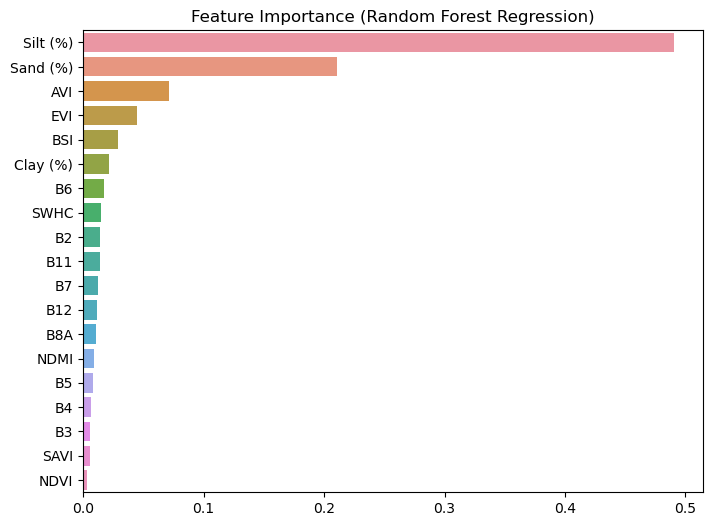

In [20]:
# feature importance

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
ftr_importances_values = model.feature_importances_
ftr_importances = pd.Series(ftr_importances_values, index=x.columns)
ftr_top = ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))
sns.barplot(x=ftr_top, y=ftr_top.index)
plt.title('Feature Importance (Random Forest Regression)')
plt.show()

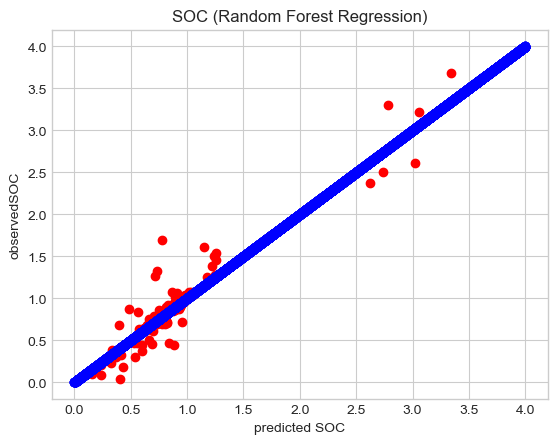

In [21]:
# Predicted versus observed SOC
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
X_grid = np.linspace(math.floor(min(model.predict(x.values))), math.ceil(max(model.predict(x.values))),10000)  # X의 최소값부터 X의 최대값까지 0.01 단위로 값 채우기
#X_grid = X_grid.reshape((len(X_grid),1))  # n X 1 행렬로 변환
plt.scatter(model.predict(x.values), y.values, color='red')
plt.scatter(X_grid,X_grid, color='blue')
plt.title('SOC (Random Forest Regression)')
plt.xlabel('predicted SOC')
plt.ylabel('observedSOC')
plt.show()